Análisis de Satisfacción usando R

In [52]:
#Librerías
#library(DBI)
library(RMySQL)
library(tidyverse)
library(ggplot2)

In [49]:
mysqlconnection = dbConnect(RMySQL::MySQL(),
                            dbname='sati',
                            host='localhost',
                            port=3306,
                            user='root',
                            password='DB123')
result = dbSendQuery(mysqlconnection, "SELECT sati,edad,proy,tiem,ause,sanc,jefe,sueld,rota FROM encuesta")
#listar coexiones dbListConnections( dbDriver( drv = "MySQL"))
#Cerrar coexiones

dat = fetch(result)
colnames(dat) <- c('sati','edad','proy','tiem','ause','sanc','jefe','suel','rota')
#lapply( dbListConnections( dbDriver( drv = "MySQL")), dbDisconnect)
#print(dbListConnections( dbDriver( drv = "MySQL")))

print(head(dat))
dim(dat)

  sati edad proy tiem ause sanc jefe suel rota
1   81   41    5    7    7    1    5 5000    5
2   89   43    6    8    1    2    5 4000    8
3   55   45    5    5    2    1    3 4000    6
4   21   NA    3    1   10    4    3 2500    4
5   NA   33   NA   NA    8    5   NA   NA   NA
6   21   24    1    3    1    3    1 1500    6


[1] 125   9

In [50]:
dat = dat[complete.cases(dat),]
rownames(dat) <- NULL 
print(head(dat))
dim(dat)

  sati edad proy tiem ause sanc jefe suel rota
1   81   41    5    7    7    1    5 5000    5
2   89   43    6    8    1    2    5 4000    8
3   55   45    5    5    2    1    3 4000    6
4   21   24    1    3    1    3    1 1500    6
5   71   35    7    5    4    5    4 4000    1
6   80   42    6    7    9    4    4 5000    8


[1] 100   9

In [51]:
fit <- lm(sati ~ proy + tiem + suel, data=dat)
summary(fit)


Call:
lm(formula = sati ~ proy + tiem + suel, data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-39.851  -7.191   0.888   6.272  24.614 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -5.085842   3.270147  -1.555    0.123    
proy         3.872294   0.533484   7.258 1.02e-10 ***
tiem         3.703452   0.754923   4.906 3.80e-06 ***
suel         0.008062   0.001362   5.920 4.98e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 10.82 on 96 degrees of freedom
Multiple R-squared:  0.8465,	Adjusted R-squared:  0.8418 
F-statistic: 176.5 on 3 and 96 DF,  p-value: < 2.2e-16


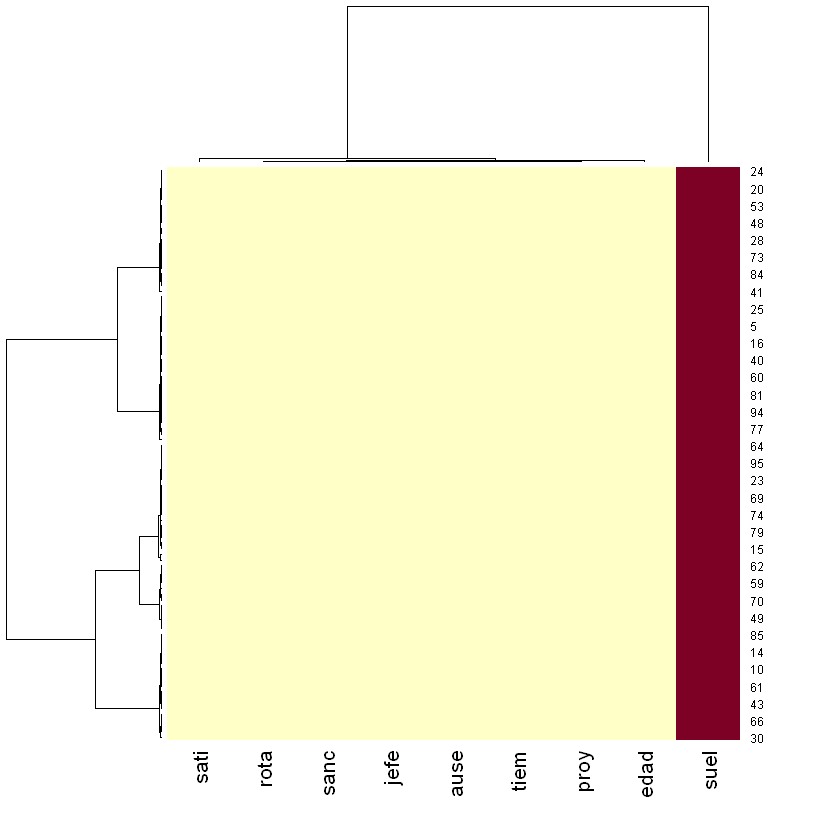

In [58]:
heatmap(as.matrix(dat))

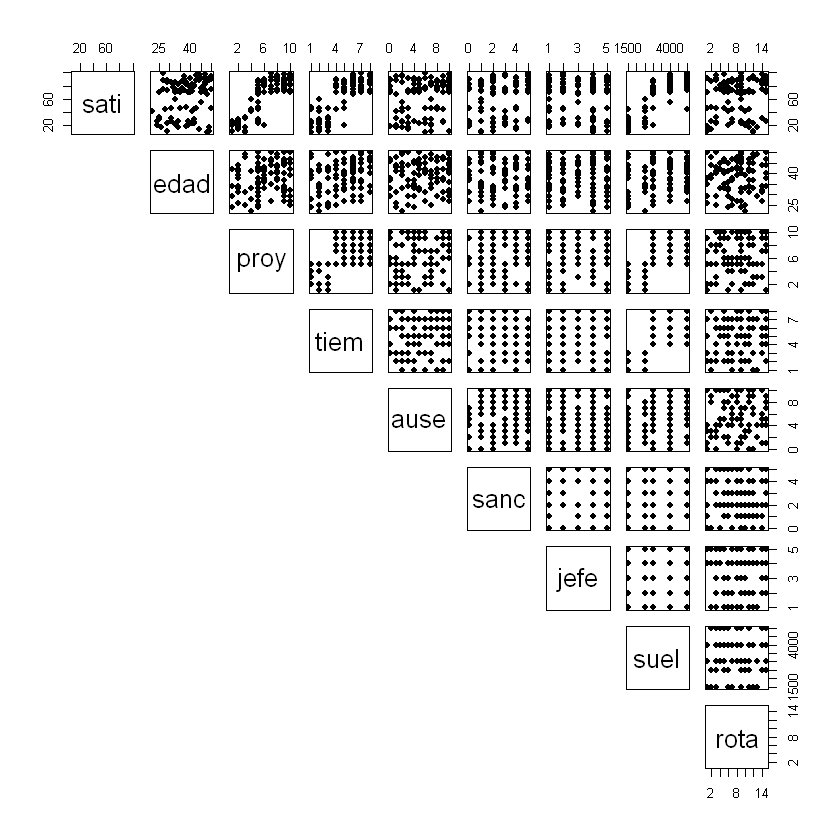

In [115]:
pairs(dat[,1:9], pch = 19, lower.panel = NULL)

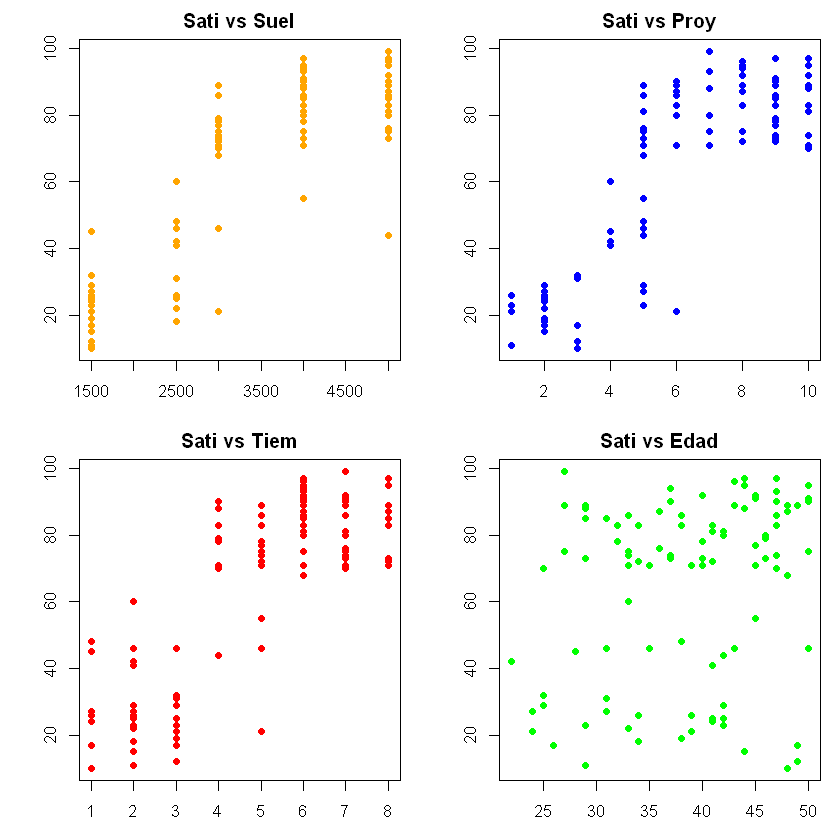

In [225]:
par(mfrow = c(2,2), mar = c(3, 4,2, 1))
plot(dat$suel, dat$sati,col = "orange", pch = 19, main="Sati vs Suel", xlab="", ylab="")
plot(dat$proy, dat$sati,col = "blue", pch = 19, main="Sati vs Proy", xlab="", ylab="")
plot(dat$tiem, dat$sati,col = "red", pch = 19, main="Sati vs Tiem", xlab="", ylab="")
plot(dat$edad, dat$sati,col = "green", pch = 19, main="Sati vs Edad", xlab="", ylab="")

In [173]:
round(cor(dat)[order(a["sati",],decreasing=TRUE),],3)

,sati,edad,proy,tiem,ause,sanc,jefe,suel,rota
sati,1.000,0.219,0.804,0.795,0.205,0.178,-0.022,0.821,0.158
suel,0.821,0.160,0.634,0.714,0.180,0.203,0.029,1.000,0.145
proy,0.804,0.204,1.000,0.616,0.199,0.229,-0.018,0.634,0.178
tiem,0.795,0.299,0.616,1.000,0.180,0.093,0.161,0.714,0.072
edad,0.219,1.000,0.204,0.299,0.055,-0.016,0.081,0.160,0.056
ause,0.205,0.055,0.199,0.180,1.000,0.045,-0.048,0.180,0.118
sanc,0.178,-0.016,0.229,0.093,0.045,1.000,-0.120,0.203,0.069
rota,0.158,0.056,0.178,0.072,0.118,0.069,-0.041,0.145,1.000
jefe,-0.022,0.081,-0.018,0.161,-0.048,-0.120,1.000,0.029,-0.041


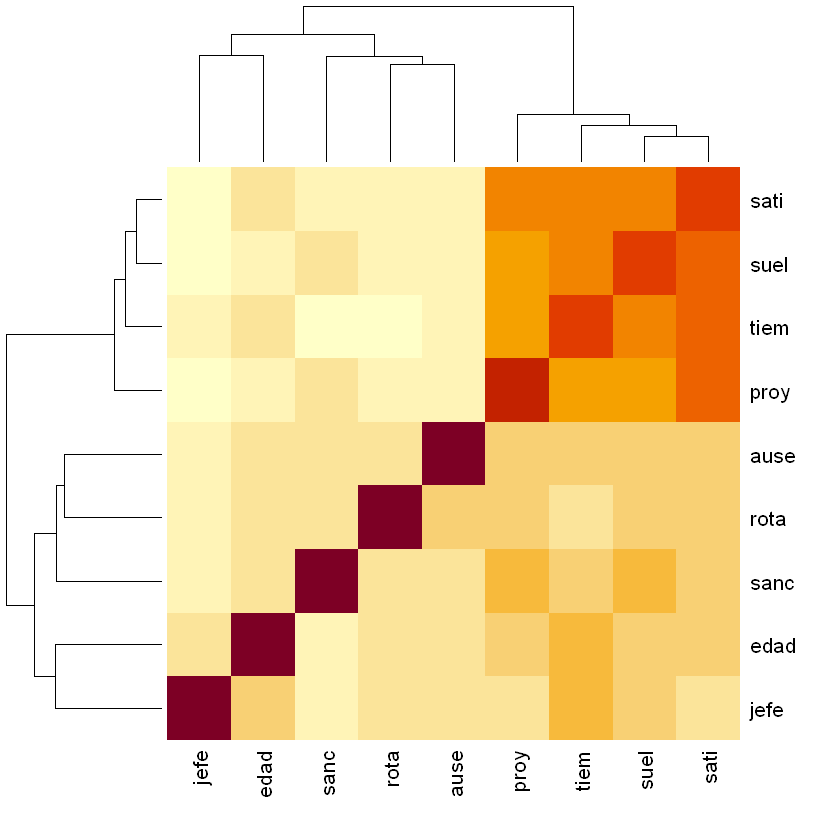

In [228]:
heatmap(cor(dat))


Attaching package: 'psych'


The following objects are masked from 'package:ggplot2':

    %+%, alpha




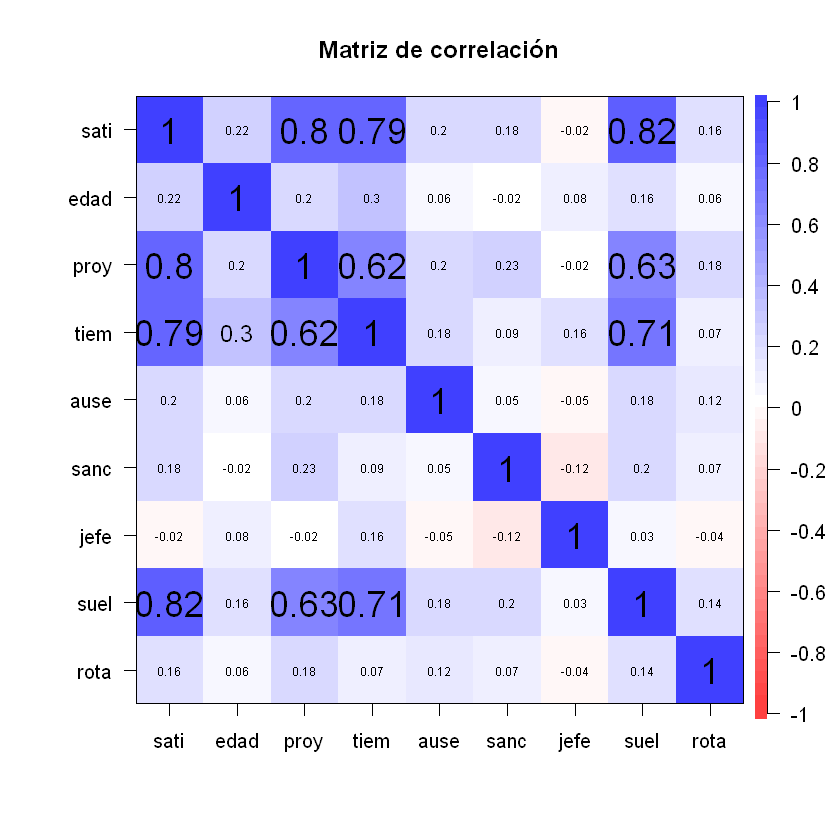

In [237]:
library(psych)

corPlot(dat, cex = 1.2, main = "Matriz de correlación")

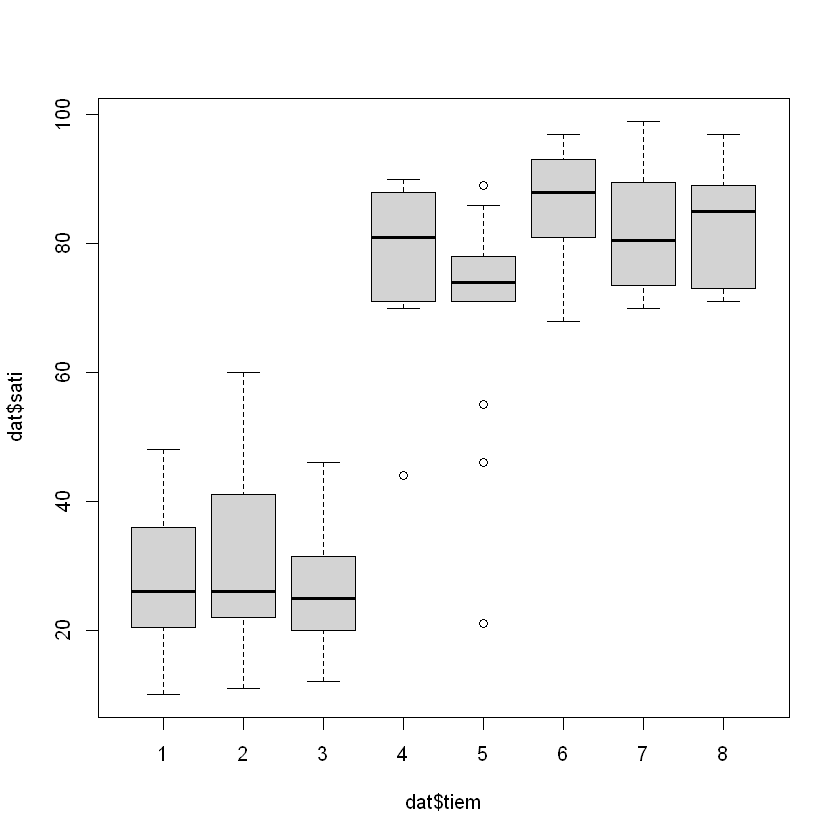

In [241]:
boxplot(dat$sati~dat$tiem)

In [260]:
cir = dat$sati
ins = 0
poc = 0
med = 0
sat = 0
for (i in a){
    if (i <= 40) {
        ins = ins +1
    } else if (i>40 && i<=70) {
        poc = poc +1
    } else if  (i>70 && i<= 80) {
        med = med +1
    } else {
        sat = sat +1
    }
}

In [287]:
eti = c('Satisfechos', 'Medio Satisfechos', 'Poco Satisfechos', 'Insatisfechos')
sizes = c(sat, med, poc, ins)
porcen <- round(100 * sizes / sum(sizes), 3)

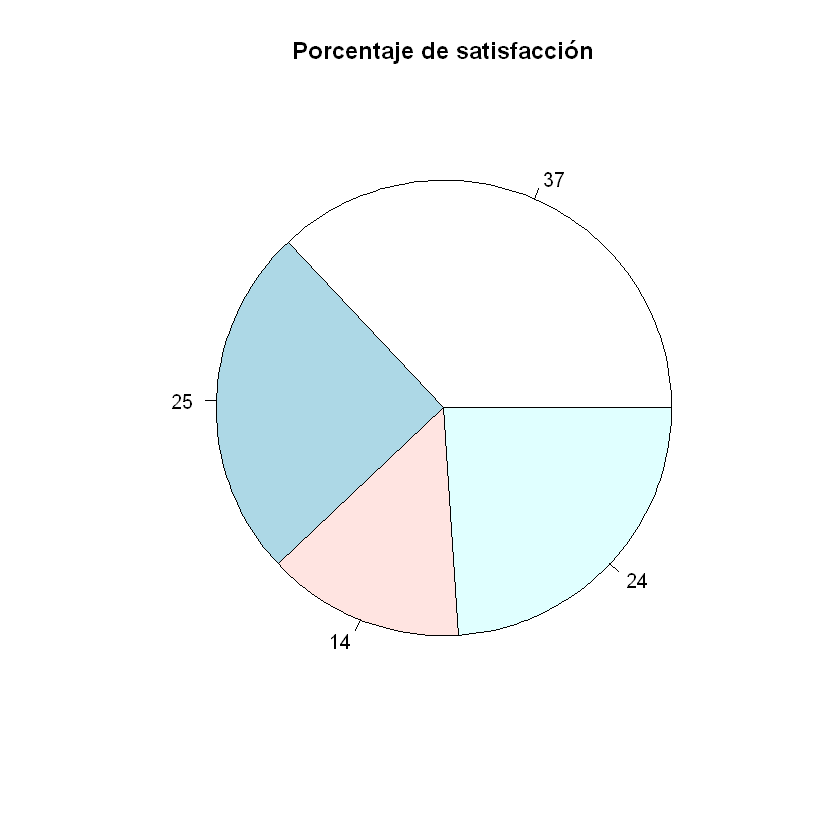

In [288]:
pie(sizes,labels = porcen,
   main="Porcentaje de satisfacción")